## **Preparing the dataset LEGO sales for merging**

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **INDEX**
1. Setup Notebook 
2. Explore data set
3. Clean data set
4. Data quality
5. Explore spread of data
6. Export data

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **1 SETUP NOTEBOOK**

In [6]:
# import libraries
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from datetime import datetime

In [7]:
# get the current working directory as a Path object
path = os.getcwd()

# update the path to parent folder
path = os.path.abspath(os.path.join(path, os.pardir))

In [8]:
# import data set LEGO sales
df_sales = pd.read_excel(os.path.join(path, '2 Data', 'Original Data', 'lego_sales.xlsx'))

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **2. EXPLORE DATA SET LEGO SALES**

In [11]:
#get number of rows and columns
df_sales.shape

(615864, 41)

In [12]:
#see what the data looks like 
df_sales.head()

,setID,number,numberVariant,name,year,theme,themeGroup,subtheme,category,released,...,CA_dateFirstAvailable,CA_dateLastAvailable,DE_retailPrice,DE_dateFirstAvailable,DE_dateLastAvailable,PL_retailPrice,Date,PriceMonthPLN,status,urlRetailPriceHistoryPLN
0,34386,10312,1,Jazz Club,2023,Icons,Model making,Modular Buildings Collection,Normal,1,...,2022-12-15T00:00:00Z,NaN,229.99,2023-01-04T00:00:00Z,NaN,1099.99,2023-01,1399.00,Available now,https://promoklocki.pl/lego-icons-10312-klub-j...
1,34386,10312,1,Jazz Club,2023,Icons,Model making,Modular Buildings Collection,Normal,1,...,2022-12-15T00:00:00Z,NaN,229.99,2023-01-04T00:00:00Z,NaN,1099.99,2023-02,1259.99,Available now,https://promoklocki.pl/lego-icons-10312-klub-j...
2,34386,10312,1,Jazz Club,2023,Icons,Model making,Modular Buildings Collection,Normal,1,...,2022-12-15T00:00:00Z,NaN,229.99,2023-01-04T00:00:00Z,NaN,1099.99,2023-03,1239.00,Available now,https://promoklocki.pl/lego-icons-10312-klub-j...
3,34386,10312,1,Jazz Club,2023,Icons,Model making,Modular Buildings Collection,Normal,1,...,2022-12-15T00:00:00Z,NaN,229.99,2023-01-04T00:00:00Z,NaN,1099.99,2023-04,1099.99,Available now,https://promoklocki.pl/lego-icons-10312-klub-j...
4,34386,10312,1,Jazz Club,2023,Icons,Model making,Modular Buildings Collection,Normal,1,...,2022-12-15T00:00:00Z,NaN,229.99,2023-01-04T00:00:00Z,NaN,1099.99,2023-05,1079.00,Available now,https://promoklocki.pl/lego-icons-10312-klub-j...


In [13]:
#remove redundant columns
#define collection
availability_col = ['US_dateFirstAvailable', 'US_dateLastAvailable', 'UK_dateFirstAvailable', 'UK_dateLastAvailable', 'CA_dateFirstAvailable', 'CA_dateLastAvailable', 'DE_dateFirstAvailable', 'DE_dateLastAvailable']

#defined drop
columns_to_drop = availability_col + ['Date', 'maxAge', 'released', 'tags', 'lastUpdated', 'urlRetailPriceCheckPLN', 'PriceMonthPLN', 'urlRetailPriceHistoryPLN']

#drop columns not relevant for analysis 
df_sales = df_sales.drop(columns=columns_to_drop)

In [14]:
df_sales.columns

Index(['setID', 'number', 'numberVariant', 'name', 'year', 'theme',
       'themeGroup', 'subtheme', 'category', 'pieces', 'minifigs', 'ownedBy',
       'wantedBy', 'rating', 'reviewCount', 'packagingType', 'availability',
       'instructionsCount', 'minAge', 'US_retailPrice', 'UK_retailPrice',
       'CA_retailPrice', 'DE_retailPrice', 'PL_retailPrice', 'status'],
      dtype='object')

In [15]:
df_sales['category'].value_counts()

category
Normal        539337
Collection     47246
Random         24406
Extended        2829
Gear            1862
Other            182
Book               2
Name: count, dtype: int64

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **3. CLEAN DATA SET**

In [18]:
#identify categories that are not sets and clean them from sets df
df_sales_sets = df_sales[~df_sales['category'].isin(['Gear', 'Other', 'Book'])]

In [19]:
#check for duplicates 
df_sales_sets.duplicated().sum()

605545

In [20]:
#assigning new dataframe for clean set
df_sales_clean = df_sales_sets.drop_duplicates()

In [21]:
#check new number of rows
f"Number of rows in sets: {df_sales.shape[0]} and number of rows on filtered sets {df_sales_clean.shape[0]}"

'Number of rows in sets: 615864 and number of rows on filtered sets 8273'

In [22]:
#check for missing values
df_sales_clean.isnull().sum()

setID                   0
number                  0
numberVariant           0
name                    0
year                    0
theme                   0
themeGroup             15
subtheme             1179
category                0
pieces                199
minifigs             2539
ownedBy                 9
wantedBy                0
rating                  0
reviewCount             0
packagingType           0
availability            0
instructionsCount       0
minAge               2374
US_retailPrice       2927
UK_retailPrice       2848
CA_retailPrice       3372
DE_retailPrice       4575
PL_retailPrice        789
status                  0
dtype: int64

In [23]:
#define subset of rows with missing pieces only
missing_pieces = df_sales_clean[df_sales_clean['pieces'].isnull()]

In [24]:
#check missing pieces by theme to identify cleaning opportunites
missing_pieces.groupby('theme').size()

theme
Collectable Minifigures    81
DUPLO                       3
Duplo                      30
Icons                       1
Marvel Super Heroes         1
Minecraft                   4
Miscellaneous               1
Ninjago                     1
Promotional                 1
Samsonite                   1
Super Mario                68
System                      1
Town                        1
Unikitty                    1
Vidiyo                      4
dtype: int64

In [25]:
#exclude non_LEGO from data set
df_sales_clean = df_sales_clean[~df_sales_clean['theme'].str.lower().isin(['duplo', 'samsonite'])]

In [26]:
#investigating super mario
missing_pieces_super_mario = df_sales_clean[(df_sales_clean['pieces'].isnull()) & (df_sales_clean['theme'] == 'Super Mario')]

In [27]:
missing_pieces_super_mario

,setID,number,numberVariant,name,year,theme,themeGroup,subtheme,category,pieces,...,packagingType,availability,instructionsCount,minAge,US_retailPrice,UK_retailPrice,CA_retailPrice,DE_retailPrice,PL_retailPrice,status
4604,34198,71413,5,Bramball,2023,Super Mario,Licensed,Character Pack - Series 6,Normal,NaN,...,Box with handle,Retail,0,7.0,NaN,NaN,NaN,NaN,25.99,Coming Soon
4670,34195,71413,0,Character Pack Series 6 {Random box},2023,Super Mario,Licensed,Character Pack - Series 6,Random,NaN,...,Box with handle,Retail,0,7.0,NaN,NaN,NaN,NaN,25.99,A gift upon purchase
4736,34202,71413,1,Blooper,2023,Super Mario,Licensed,Character Pack - Series 6,Normal,NaN,...,Box with handle,Retail,18,7.0,NaN,NaN,NaN,NaN,25.99,A gift upon purchase
4802,34197,71413,2,Green Toad,2023,Super Mario,Licensed,Character Pack - Series 6,Normal,NaN,...,Box with handle,Retail,0,7.0,NaN,NaN,NaN,NaN,25.99,A gift upon purchase
4868,34203,71413,3,Ice Bro,2023,Super Mario,Licensed,Character Pack - Series 6,Normal,NaN,...,Box with handle,Retail,0,7.0,NaN,NaN,NaN,NaN,25.99,A gift upon purchase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106876,30547,71361,6,Bob-omb,2020,Super Mario,Licensed,Character Pack - Series 1,Normal,NaN,...,Foil pack,Retail,0,NaN,NaN,NaN,NaN,NaN,10.99,Lack of data
107292,30548,71361,7,Eep Cheep,2020,Super Mario,Licensed,Character Pack - Series 1,Normal,NaN,...,Foil pack,Retail,0,NaN,NaN,NaN,NaN,NaN,10.99,Lack of data
107708,30549,71361,8,Blooper,2020,Super Mario,Licensed,Character Pack - Series 1,Normal,NaN,...,Foil pack,Retail,0,NaN,NaN,NaN,NaN,NaN,10.99,Lack of data
108124,30550,71361,9,Urchin,2020,Super Mario,Licensed,Character Pack - Series 1,Normal,NaN,...,Foil pack,Retail,0,NaN,NaN,NaN,NaN,NaN,10.99,Lack of data


> Super mario missing pieces are character packs, they cannot be imputed. 

In [29]:
#define collection
all_retailprice=['US_retailPrice', 'UK_retailPrice', 'CA_retailPrice', 'DE_retailPrice', 'PL_retailPrice']


df_sales_clean.groupby('number')[all_retailprice].mean()

,US_retailPrice,UK_retailPrice,CA_retailPrice,DE_retailPrice,PL_retailPrice
number,,,,,
620,4.99,7.49,7.99,NaN,32.99
626,4.99,7.49,7.99,NaN,28.00
628,14.99,10.49,19.99,NaN,28.00
630,2.49,2.09,2.99,2.49,10.99
928,NaN,NaN,NaN,NaN,241.00
...,...,...,...,...,...
5005747,NaN,NaN,NaN,NaN,199.99
6384342,NaN,NaN,NaN,NaN,NaN
6385434,NaN,NaN,NaN,NaN,369.00


In [30]:
#inspect retailprices to decide on handling missing values
df_sales_clean[df_sales_clean[['US_retailPrice', 'UK_retailPrice', 'CA_retailPrice', 'DE_retailPrice', 'PL_retailPrice']].isnull().any(axis=1)]

,setID,number,numberVariant,name,year,theme,themeGroup,subtheme,category,pieces,...,packagingType,availability,instructionsCount,minAge,US_retailPrice,UK_retailPrice,CA_retailPrice,DE_retailPrice,PL_retailPrice,status
19,34527,71038,7,Queen of Hearts,2023,Collectable Minifigures,Miscellaneous,Disney 100,Normal,8.0,...,Foil pack,Retail,0,5.0,NaN,NaN,NaN,NaN,17.99,Available now
124,34528,71038,8,Aurora,2023,Collectable Minifigures,Miscellaneous,Disney 100,Normal,7.0,...,Foil pack,Retail,0,5.0,NaN,NaN,NaN,NaN,17.99,Temporarily out of stock
229,34520,71038,0,LEGO Minifigures - Disney 100 Series {Random bag},2023,Collectable Minifigures,Miscellaneous,Disney 100,Random,NaN,...,Foil pack,Retail,0,5.0,NaN,NaN,NaN,NaN,17.99,Coming Soon
334,34521,71038,1,Oswald the Lucky Rabbit,2023,Collectable Minifigures,Miscellaneous,Disney 100,Normal,5.0,...,Foil pack,Retail,2,5.0,NaN,NaN,NaN,NaN,17.99,Coming Soon
439,34522,71038,2,Pinocchio,2023,Collectable Minifigures,Miscellaneous,Disney 100,Normal,6.0,...,Foil pack,Retail,0,5.0,NaN,NaN,NaN,NaN,17.99,Available now
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615854,3152,6305,1,Trees and Flowers,1980,Town,Modern day,Accessories,Normal,12.0,...,Box,Retail,0,NaN,NaN,NaN,NaN,NaN,12.99,Retired Product
615855,3216,6364,1,Paramedic Unit,1980,Town,Modern day,Medical,Normal,137.0,...,Box,Retail,0,NaN,NaN,NaN,NaN,NaN,210.00,Retired Product
615856,3484,6627,1,Convertible,1980,Town,Modern day,Vehicles,Normal,37.0,...,Box,Retail,0,NaN,NaN,NaN,NaN,NaN,529.99,Retired Product
615858,4010,7814,1,Crane Wagon,1980,Trains,Modern day,4.5/12V,Normal,113.0,...,{Not specified},{Not specified},0,NaN,NaN,NaN,NaN,NaN,49.00,Retired Product


In [31]:
#counting rows by status for the missing retail prices
grouped_rp_na = df_sales_clean.groupby('status')[[*all_retailprice, 'pieces']].apply(lambda x: x.isnull().sum())

#sum the unique occurances per column
grouped_rp_na.loc['Total'] = grouped_rp_na.sum()

grouped_rp_na

,US_retailPrice,UK_retailPrice,CA_retailPrice,DE_retailPrice,PL_retailPrice,pieces
status,,,,,,
A gift upon purchase,46,45,46,46,1,22
Available now,129,125,134,125,25,18
Backorders Accepted,0,0,0,0,0,0
Coming Soon,16,16,16,16,5,4
Lack of data,855,827,854,831,252,88
Pre-Order,5,5,5,5,1,0
Retired Product,1685,1659,2089,3213,417,30
Sold out,11,11,11,11,3,1
Temporarily out of stock,20,18,20,18,4,2


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **4. DATA QUALITY**

In [34]:
#check for mixed data type columns
for col in df_sales_clean.columns.tolist():
    types_in_column = df_sales_clean[col].apply(type)
    print(f"Name column: {col}, Type: {types_in_column.unique()}") 
    if len(types_in_column.unique()) > 1:
        display(HTML(f"<b>Column '{col}' contains mixed types</b>"))

Name column: setID, Type: [<class 'int'>]
Name column: number, Type: [<class 'int'>]
Name column: numberVariant, Type: [<class 'int'>]
Name column: name, Type: [<class 'str'>]
Name column: year, Type: [<class 'int'>]
Name column: theme, Type: [<class 'str'>]
Name column: themeGroup, Type: [<class 'str'> <class 'float'>]


Name column: subtheme, Type: [<class 'str'> <class 'float'>]


Name column: category, Type: [<class 'str'>]
Name column: pieces, Type: [<class 'float'>]
Name column: minifigs, Type: [<class 'float'>]
Name column: ownedBy, Type: [<class 'float'>]
Name column: wantedBy, Type: [<class 'int'>]
Name column: rating, Type: [<class 'float'>]
Name column: reviewCount, Type: [<class 'int'>]
Name column: packagingType, Type: [<class 'str'>]
Name column: availability, Type: [<class 'str'>]
Name column: instructionsCount, Type: [<class 'int'>]
Name column: minAge, Type: [<class 'float'>]
Name column: US_retailPrice, Type: [<class 'float'>]
Name column: UK_retailPrice, Type: [<class 'float'>]
Name column: CA_retailPrice, Type: [<class 'float'>]
Name column: DE_retailPrice, Type: [<class 'float'>]
Name column: PL_retailPrice, Type: [<class 'float'>]
Name column: status, Type: [<class 'str'>]


In [35]:
#unify and correct data types to categories 
df_sales_clean.loc[:, 'themeGroup'] = df_sales_clean.loc[:, 'themeGroup'].astype('category')
df_sales_clean.loc[:, 'subtheme'] = df_sales_clean.loc[:, 'subtheme'].astype('category')

In [36]:
#correct data type year from numeric int to datetime in years only
df_sales_clean.loc[:, 'year_time'] = pd.to_datetime(df_sales_clean.loc[:, 'year'], format='%Y')
df_sales_clean.loc[:, 'year_period'] = df_sales_clean.loc[:, 'year_time'].dt.to_period('Y')

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [38]:
#check numerical values
columns_to_describe = ['year_period', 'pieces', 'minifigs', 'ownedBy', 'wantedBy', 'rating', 
                       'reviewCount', 'instructionsCount', 'US_retailPrice', 'UK_retailPrice', 
                       'CA_retailPrice', 'DE_retailPrice', 'PL_retailPrice']

# describe the selected columns
df_sales_clean[columns_to_describe].describe().round()

,pieces,minifigs,ownedBy,wantedBy,rating,reviewCount,instructionsCount,US_retailPrice,UK_retailPrice,CA_retailPrice,DE_retailPrice,PL_retailPrice
count,7538.0,5355.0,7694.0,7703.0,7703.0,7703.0,7703.0,4936.0,4997.0,4528.0,3438.0,6995.0
mean,337.0,3.0,3740.0,1201.0,3.0,4.0,2.0,46.0,39.0,59.0,50.0,246.0
std,600.0,3.0,3434.0,1184.0,2.0,6.0,3.0,63.0,53.0,80.0,68.0,443.0
min,0.0,1.0,3.0,7.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0
25%,46.0,1.0,1244.0,458.0,3.0,0.0,0.0,13.0,10.0,16.0,15.0,43.0
50%,148.0,2.0,2692.0,808.0,4.0,2.0,2.0,25.0,20.0,35.0,30.0,100.0
75%,389.0,4.0,5260.0,1568.0,4.0,5.0,3.0,50.0,45.0,70.0,60.0,260.0
max,11695.0,32.0,29480.0,13949.0,5.0,93.0,48.0,850.0,735.0,1050.0,850.0,8500.0


In [39]:
#check categorical columns
df_sales_clean['theme'].value_counts()

theme
Collectable Minifigures    804
City                       637
Star Wars                  630
Friends                    415
Creator                    324
                          ... 
LEGO Universe                1
Dino Attack                  1
Spybotics                    1
Hobby Set                    1
Assorted                     1
Name: count, Length: 132, dtype: int64

In [40]:
df_sales_clean['themeGroup'].value_counts()

themeGroup
Licensed            2081
Modern day          1419
Miscellaneous       1361
Action/Adventure     831
Model making         520
Technical            364
Historical           316
Constraction         283
Basic                128
Racing               120
Art and crafts        90
Junior                77
Educational           70
Girls                 20
Vintage                6
Pre-school             2
Name: count, dtype: int64

In [41]:
df_sales_clean['subtheme'].value_counts()

subtheme
3 in 1                200
Promotional           149
Miscellaneous         118
Police                 99
Licensed               93
                     ... 
Reboot                  1
Toyota                  1
NXT 2.0                 1
Koenigsegg              1
Product collection      1
Name: count, Length: 614, dtype: int64

In [42]:
df_sales_clean['category'].value_counts()

category
Normal        7360
Extended       155
Collection     135
Random          53
Name: count, dtype: int64

In [43]:
df_sales_clean['status'].value_counts()

status
Retired Product             3828
Lack of data                3140
Available now                422
A gift upon purchase         122
Coming Soon                   67
Temporarily out of stock      64
Sold out                      40
Pre-Order                     19
Backorders Accepted            1
Name: count, dtype: int64

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **5.EXPLORE SPREAD OF DATA**

In [46]:
#check spread of sets in all years 
sets_by_year = df_sales_clean.groupby('year_period')['number'].count()

In [47]:
sets_by_year

year_period
1955      7
1956      1
1957      1
1970      1
1976      2
1978      4
1979      1
1980      8
1981     12
1982      5
1983     10
1984     13
1985     19
1986     20
1987     16
1988     20
1989     26
1990     26
1991     34
1992     35
1993     34
1994     33
1995     29
1996     43
1997     55
1998     83
1999    103
2000     91
2001     61
2002     61
2003     85
2004     81
2005     93
2006     97
2007    128
2008    174
2009    198
2010    247
2011    293
2012    349
2013    380
2014    424
2015    466
2016    505
2017    494
2018    504
2019    437
2020    480
2021    540
2022    491
2023    383
Freq: Y-DEC, Name: number, dtype: int64

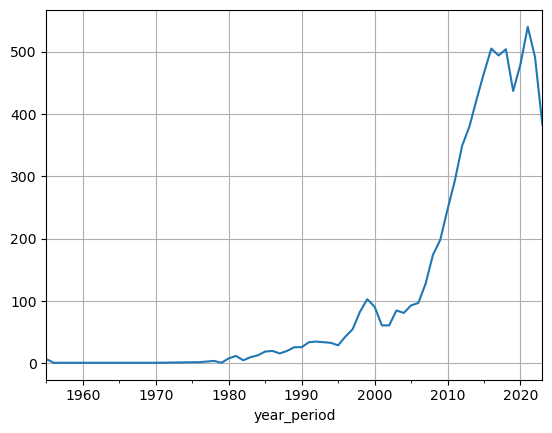

In [48]:
# plotting
sets_by_year_plot = sets_by_year.plot(kind='line')
plt.xlabel('year_period')
plt.grid()

**Exploring the presence of retail prices each country to identify any gaps in the data and asses feasibilty to perform time series analysis**

In [50]:
#see sales by country
sales_by_year_country = df_sales_clean.groupby('year_period')[all_retailprice].count()

In [51]:
sales_by_year_country

,US_retailPrice,UK_retailPrice,CA_retailPrice,DE_retailPrice,PL_retailPrice
year_period,,,,,
1955,0,0,0,0,7
1956,0,0,0,0,1
1957,0,0,0,0,1
1970,0,0,0,0,1
1976,0,0,0,0,2
1978,0,0,0,0,4
1979,0,0,0,0,1
1980,0,0,0,0,8
1981,0,0,0,0,12


> **Conclusion: The missing retail prices will allow any timeseries to be performed on the last 18 years only, from 2005-2023.**

In [53]:
#how many lego pieces per year were released
pieces_by_year = df_sales_clean.groupby('year_period')['pieces'].sum()

Text(0.5, 0, 'year_period')

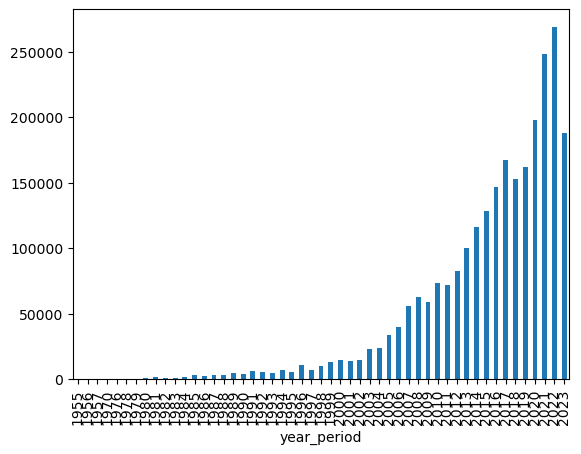

In [54]:
pieces_by_year_plot = pieces_by_year.plot(kind='bar')
plt.xlabel('year_period')

In [55]:
#how many minifigs per year were released
minifigs_by_year = df_sales_clean.groupby('year_period')['minifigs'].sum()

Text(0.5, 0, 'year_period')

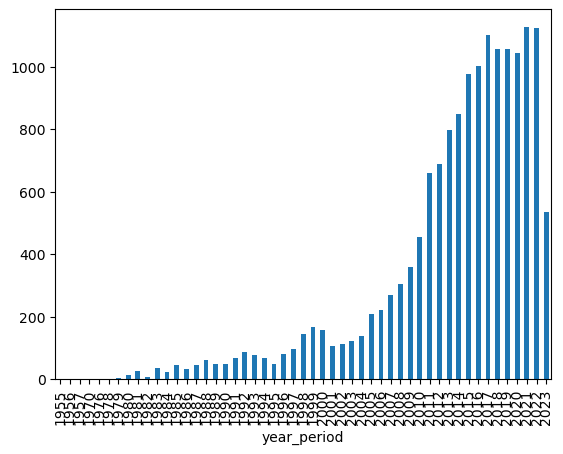

In [56]:
minifigs_by_year_plot = minifigs_by_year.plot(kind='bar')
plt.xlabel('year_period')

In [57]:
#themes by year
themes_by_year = df_sales_clean.pivot_table(index='year_period', columns='themeGroup', aggfunc='size')

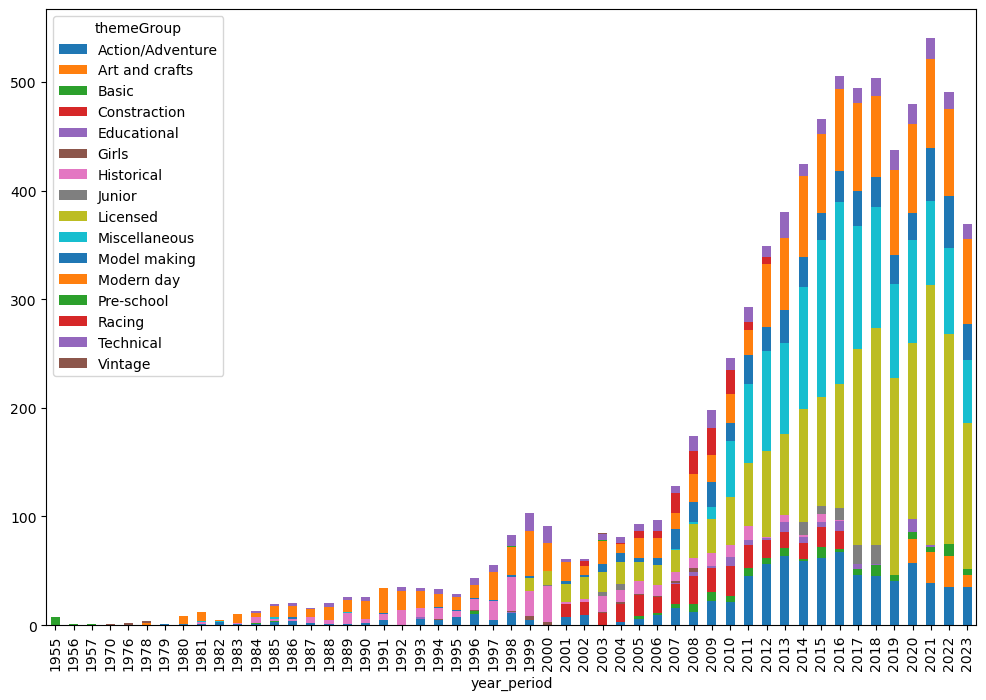

In [58]:
themes_by_year_plot = themes_by_year.plot(kind='bar', stacked=True, figsize=(12, 8))

> **Licensed-themed LEGO sets helped save the company from bankruptcy. Based on this barchart, I want to explor their impact from 2017 to 2020 seeing the scale / size of the theme.**

In [60]:
#how many instructions by theme
instructions_by_theme = df_sales_clean.groupby('theme')['instructionsCount'].agg(['min', 'max', 'mean'])

In [61]:
instructions_by_theme

,min,max,mean
theme,,,
4 Juniors,0,2,1.555556
Advanced models,0,12,3.172414
Adventurers,0,1,0.703704
Agents,1,4,2.000000
Alpha Team,0,1,0.812500
...,...,...,...
Vikings,2,2,2.000000
Western,0,2,0.636364
World City,1,2,1.076923


In [62]:
#how many instructions by no. of pieces
instructions_by_pieces = df_sales_clean.groupby('instructionsCount')['pieces'].agg(['min', 'max', 'mean'])

In [63]:
instructions_by_pieces

,min,max,mean
instructionsCount,,,
0,0.0,6163.0,151.029906
1,6.0,5197.0,210.028670
2,3.0,5923.0,296.859993
3,8.0,5922.0,362.074675
4,16.0,4124.0,421.178657
5,20.0,3929.0,375.261682
6,12.0,2766.0,542.140984
7,115.0,11695.0,1370.043478
8,76.0,6785.0,1036.486726


In [64]:
#get better picture of scale
instructions_by_pieces_scat = df_sales_clean.groupby('instructionsCount')['pieces'].mean()

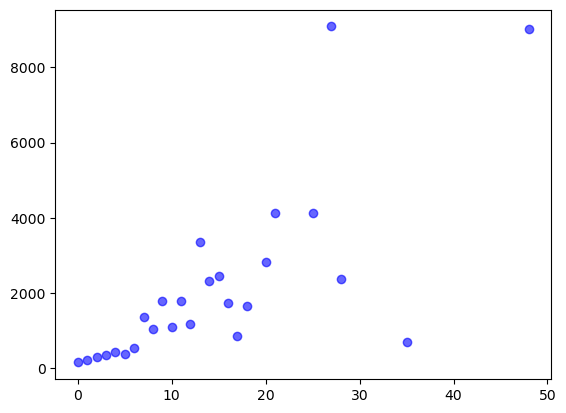

In [65]:
plt.scatter(instructions_by_pieces_scat.index, instructions_by_pieces_scat.values, color='blue', alpha=0.6)

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **6. EXPORT DATA**

In [68]:
#export to csv
df_sales_clean.to_csv(os.path.join(path, '2 Data','Prepared data', 'lego_sales_sub.csv'))